In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

**Importing the dataset**

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data = pd.get_dummies(data,drop_first=True)
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [4]:
features = [feat for feat in data.columns if feat!= "Purchased" and feat!='User ID']
X = data[features]
Y = data.Purchased

**Splitting the dataset into the Training set and Test set**

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=300)
print(x_test.shape)
print(x_train.shape)

(80, 3)
(320, 3)


**Feature Scaling**

In [6]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
x_train = pd.DataFrame(scl.fit_transform(x_train),columns=x_train.columns)
x_test = pd.DataFrame(scl.fit_transform(x_test),columns=x_test.columns)

**Fitting Random Forest to the Training set**

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

**Predicting the Test set results**

In [9]:
y_pred = RFC.predict(x_test)

**Making the Confusion Matrix**

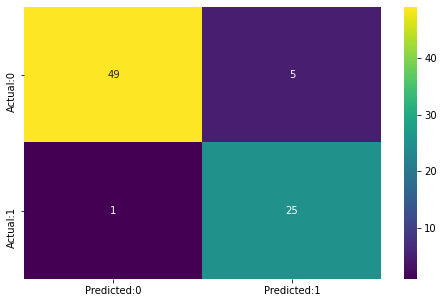







--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        54
           1       0.83      0.96      0.89        26

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



In [11]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap ='viridis' )
plt.show()
print('\n')
print('\n')
print('\n')
print('-'*80)
report = classification_report(y_test,y_pred)
print(report)

**Visualising the Training set results**

In [16]:
RFC.score(x_train,y_train)

0.996875

**Visualising the Test set results**

In [17]:
RFC.score(x_test,y_test)

0.925